# Requests and APIs

Here I will demonstrate:
- Downloading an HTML file using __requests__.
- Use __BeautifulSoup__ to extract data from the HTML file.
- Use __Pandas__ to read a table in from HTML.
- Using various __APIs__.


In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

### Using requests
I seldom use anything other than __GET__, so that's what I will demonstrate.

My task: scrape a bunch of dairy cow data from an online database.

For example, what are the stats for the cow with the ID __"29HO18225"__?

In [10]:
url = "https://www.naab-css.org/dairy-cross-reference-results"

r = requests.get(url,params={"naab":"29HO18225"})

r.status_code

200

It starts with a 2, we are good to go!

Issue with this site, is it would have given a 2 regardless. If the ID wasnt real, it would have just returned an empty table.

Notice that the url actually redirected:

In [11]:
r.url

'https://www.naab-css.org/dairy-cross-reference/HOUSA000074024948'

So another way to do this is without the "keywords" param if I happen to know the other id which is above (and this is actually what I ended up doing).

In [13]:
new_url = 'https://www.naab-css.org/dairy-cross-reference/HOUSA000074024948'
r = requests.get(new_url)
r

<Response [200]>

Instead of feeding IDs into the `params`, I would just make new URL strings.

Ok so what is in `r` now?

In [14]:
r.text

'\r\n\r\n<!DOCTYPE html>\r\n<html lang="en">\r\n<head><meta charset="utf-8" /><meta http-equiv="X-UA-Compatible" content="IE=edge" /><script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"bfc5d53ca6","applicationID":"321594522","transactionName":"b1ZabEBUXUNXB0RYDFYceWtiGldRXxZJHABKXEtLH0dWVlMWVV8AXR5cXUZUWlxFSlFCE0A=","queueTime":0,"applicationTime":442,"agent":"","atts":""}</script><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"bfc5d53ca6",applicationID:"321594522"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(e,t,n){function r(){}function i(e,t,n){return function(){return o(e,[u.now()].concat(

In "text" it just stored the entire HTML of that output page. How do we get data out of it?

__BeautifulSoup__ is a package that gives tools for finding elements in HTML files.

HTML has several tags, such as:
- `<a>`: hyperlinks
- `<p>`: paragraphs
- `<h1>`: headers
- `<table>`: table wrappers.
    - `<td>`: table data
    - `<tr>`: rows of the table.
    - `<th>`: headers of the table.

BeautifulSoup first creates a "soup" object:

In [15]:
soup = BeautifulSoup(r.text,'html.parser')

soup


<!DOCTYPE html>

<html lang="en">
<head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"bfc5d53ca6","applicationID":"321594522","transactionName":"b1ZabEBUXUNXB0RYDFYceWtiGldRXxZJHABKXEtLH0dWVlMWVV8AXR5cXUZUWlxFSlFCE0A=","queueTime":0,"applicationTime":442,"agent":"","atts":""}</script><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"bfc5d53ca6",applicationID:"321594522"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(e,t,n){function r(){}function i(e,t,n){return function(){return o(e,[u.now()].concat(c(arguments)),t

Now we can search for tags:

In [16]:
links = soup.find_all("a")

links[:2]

[<a class="SkipLink" href="#MainContent">Skip to Content</a>,
 <a href="/"><img alt="National Association of Animal Breeders: Return to homepage" src="/images/logo.svg"/></a>]

Each of these tags has attributes you can access.

In [17]:
links[0],\
links[0]['class'],\
links[0]['href'],\
links[0].contents

(<a class="SkipLink" href="#MainContent">Skip to Content</a>,
 ['SkipLink'],
 '#MainContent',
 ['Skip to Content'])

All the titles of the links:

In [20]:
[x.contents[0] for x in links]

['Skip to Content',
 <img alt="National Association of Animal Breeders: Return to homepage" src="/images/logo.svg"/>,
 <img alt="Certified Semen Services: Return to homepage" src="/images/css-logo-blue.svg"/>,
 'Login',
 'Home',
 'About',
 'NAAB',
 'History',
 'Bylaws',
 'Code of Ethics',
 'Awards',
 'AI Careers',
 'NAAB Cross Reference Program',
 'Anti-Trust Compliance',
 'Staffing',
 'CSS',
 'Minimum Requirements',
 'Overview & Audits',
 'Management Guidelines',
 'Bylaws',
 'Participation Agreement',
 'OIE-CSS Health Chart',
 'CSS Participants',
 'Services & Programs',
 'NAAB Marketing Code',
 'NAAB Uniform Coding System',
 'NAAB-ICAR Stud Location Codes Guidelines',
 'NAAB-Forms and Applications',
 'News & Alerts',
 'Calendar of Events',
 'Cross Reference Calendar',
 'Blog',
 'Committees & Directors',
 'Membership',
 'Become a Member',
 'Databases',
 'Dairy Cross Reference',
 'Beef Cross Reference',
 'Active (A) Sire Evaluation Database',
 'Foreign (F) Sire Evaluation Database',
 'G

What I was looking for specifically was the table, which I can find looking for "table."

This function `find` returns the first instance:

In [21]:
naab_table = soup.find("table")

naab_table

<table class="DairyCrossTable">
<tbody>
<tr>
<td><strong>Breed</strong></td>
<td>HO</td>
</tr>
<tr>
<td><strong>Country</strong></td>
<td>USA</td>
</tr>
<tr>
<td><strong>ID Number</strong></td>
<td>000074024948</td>
</tr>
<tr>
<td><strong>Semen Release Date</strong></td>
<td>2016-8</td>
</tr>
<tr>
<td><strong>Status</strong></td>
<td>A</td>
</tr>
<tr>
<td><strong>Sampling Code</strong></td>
<td> </td>
</tr>
<tr>
<td><strong>Original Controller</strong></td>
<td></td>
</tr>
<tr>
<td><strong>Reg. Name</strong></td>
<td>PINE-TREE BURLEY-ET</td>
</tr>
<tr>
<td><strong>Short Name</strong></td>
<td>BURLEY</td>
</tr>
<tr>
<td><strong>Birthdate</strong></td>
<td>5/25/2015</td>
</tr>
<tr>
<td><strong>Sire Breed</strong></td>
<td>HO</td>
</tr>
<tr>
<td><strong>Sire Country</strong></td>
<td>CAN</td>
</tr>
<tr>
<td><strong>Sire ID Number</strong></td>
<td>000011857447</td>
</tr>
<tr>
<td><strong>Dam Breed</strong></td>
<td>HO</td>
</tr>
<tr>
<td><strong>Dam Country</strong></td>
<td>USA</td>
</tr

#### Using Beautiful Soup to Extract Data:

In [22]:
row_labels = [x.string for x in naab_table.find_all("td")[0::2]]

row_labels

['Breed',
 'Country',
 'ID Number',
 'Semen Release Date',
 'Status',
 'Sampling Code',
 'Original Controller',
 'Reg. Name',
 'Short Name',
 'Birthdate',
 'Sire Breed',
 'Sire Country',
 'Sire ID Number',
 'Dam Breed',
 'Dam Country',
 'Dam ID Number',
 'MGS Breed',
 'MGS Country',
 'MGS ID Number',
 'Controller Number',
 'Primary NAAB Code',
 'Secondary NAAB Code(s)',
 'Genotype Information']

In [23]:
row_values = [[y for y in x.strings] for x in naab_table.find_all("td")[1::2]]
row_values

[['HO'],
 ['USA'],
 ['000074024948'],
 ['2016-8'],
 ['A'],
 [' '],
 [],
 ['PINE-TREE BURLEY-ET'],
 ['BURLEY'],
 ['5/25/2015'],
 ['HO'],
 ['CAN'],
 ['000011857447'],
 ['HO'],
 ['USA'],
 ['000071859525'],
 ['HO'],
 ['USA'],
 ['000069169951'],
 ['0029'],
 ['029HO18225'],
 ['629HO18225', '529HO18225', '602HO18225', '604HO18225'],
 ['TC TV TL TY TD']]

In [24]:
amended_values = [x[0] if len(x)==1 else " ".join(x) for x in row_values]
amended_values

['HO',
 'USA',
 '000074024948',
 '2016-8',
 'A',
 ' ',
 '',
 'PINE-TREE BURLEY-ET',
 'BURLEY',
 '5/25/2015',
 'HO',
 'CAN',
 '000011857447',
 'HO',
 'USA',
 '000071859525',
 'HO',
 'USA',
 '000069169951',
 '0029',
 '029HO18225',
 '629HO18225 529HO18225 602HO18225 604HO18225',
 'TC TV TL TY TD']

#### Using Pandas to extract html data:

In [25]:
naab_table

<table class="DairyCrossTable">
<tbody>
<tr>
<td><strong>Breed</strong></td>
<td>HO</td>
</tr>
<tr>
<td><strong>Country</strong></td>
<td>USA</td>
</tr>
<tr>
<td><strong>ID Number</strong></td>
<td>000074024948</td>
</tr>
<tr>
<td><strong>Semen Release Date</strong></td>
<td>2016-8</td>
</tr>
<tr>
<td><strong>Status</strong></td>
<td>A</td>
</tr>
<tr>
<td><strong>Sampling Code</strong></td>
<td> </td>
</tr>
<tr>
<td><strong>Original Controller</strong></td>
<td></td>
</tr>
<tr>
<td><strong>Reg. Name</strong></td>
<td>PINE-TREE BURLEY-ET</td>
</tr>
<tr>
<td><strong>Short Name</strong></td>
<td>BURLEY</td>
</tr>
<tr>
<td><strong>Birthdate</strong></td>
<td>5/25/2015</td>
</tr>
<tr>
<td><strong>Sire Breed</strong></td>
<td>HO</td>
</tr>
<tr>
<td><strong>Sire Country</strong></td>
<td>CAN</td>
</tr>
<tr>
<td><strong>Sire ID Number</strong></td>
<td>000011857447</td>
</tr>
<tr>
<td><strong>Dam Breed</strong></td>
<td>HO</td>
</tr>
<tr>
<td><strong>Dam Country</strong></td>
<td>USA</td>
</tr

In [27]:
pd.read_html(str(naab_table))[0]

,0,1
0,Breed,HO
1,Country,USA
2,ID Number,000074024948
3,Semen Release Date,2016-8
4,Status,A
5,Sampling Code,NaN
6,Original Controller,NaN
7,Reg. Name,PINE-TREE BURLEY-ET
8,Short Name,BURLEY
9,Birthdate,5/25/2015


## API Examples

### Google Maps "Geocode" API
https://developers.google.com/maps/documentation

This API lets you query geographic information based on a name using the Google Maps engine. Google Maps has several APIs, including ones that give directions, distances, or locations of things.

__Note: this API is not free, unlike the other examples. Google charges by the Query once you set up an account and billing information.__

Here we are going to find out the address of the famous Morrow Plots, the oldest experiment plot in the United States.

In [29]:
location = "Morrow Plots"

In [30]:
# We're going to use a specific URL, which looks ups geocodes and sends back JSON files.
url = 'https://maps.googleapis.com/maps/api/geocode/json'

# Put that junk into a dictionary
PARAMS = {'address':location,'key':map_key}

In [31]:
# Using GET, we are fetching data from that URL and putting in those parameter.
r = requests.get(url = url, params = PARAMS)

# Check the status code:
r.status_code

200

A status code of 200 = Success!

Now let's look at the data in JSON:

In [32]:
data = r.json()
data

{'results': [{'address_components': [{'long_name': '1102',
     'short_name': '1102',
     'types': ['street_number']},
    {'long_name': 'South Goodwin Avenue',
     'short_name': 'S Goodwin Ave',
     'types': ['route']},
    {'long_name': 'Urbana',
     'short_name': 'Urbana',
     'types': ['locality', 'political']},
    {'long_name': 'Cunningham Township',
     'short_name': 'Cunningham Township',
     'types': ['administrative_area_level_3', 'political']},
    {'long_name': 'Champaign County',
     'short_name': 'Champaign County',
     'types': ['administrative_area_level_2', 'political']},
    {'long_name': 'Illinois',
     'short_name': 'IL',
     'types': ['administrative_area_level_1', 'political']},
    {'long_name': 'United States',
     'short_name': 'US',
     'types': ['country', 'political']},
    {'long_name': '61801', 'short_name': '61801', 'types': ['postal_code']}],
   'formatted_address': '1102 S Goodwin Ave, Urbana, IL 61801, USA',
   'geometry': {'location': {'l

So now we have a nest JSON file which can be read as a dictionary. Let's access the "formatted_address" field to see if it found the right location.

In [33]:
data['results'][0]['formatted_address']

'1102 S Goodwin Ave, Urbana, IL 61801, USA'

Right in our backyard!

### Lord of the Rings API

https://the-one-api.dev/

This API contains information about the book and movie series Lord of the Rings. To access different datasets, we need to pass different URLs, and in this case we're going to access the "movie" database.

Note here that instead of authenticating using "params" we are putting in a "header," which is a different way to pass a key that is sometimes used to authenticate.

In [34]:
movies = requests.get("https://the-one-api.dev/v2/movie",headers=headers)
movies

<Response [200]>

Success, so let's keep going.

In [35]:
movies.json()

{'docs': [{'_id': '5cd95395de30eff6ebccde56',
   'name': 'The Lord of the Rings Series',
   'runtimeInMinutes': 558,
   'budgetInMillions': 281,
   'boxOfficeRevenueInMillions': 2917,
   'academyAwardNominations': 30,
   'academyAwardWins': 17,
   'rottenTomatesScore': 94},
  {'_id': '5cd95395de30eff6ebccde57',
   'name': 'The Hobbit Series',
   'runtimeInMinutes': 462,
   'budgetInMillions': 675,
   'boxOfficeRevenueInMillions': 2932,
   'academyAwardNominations': 7,
   'academyAwardWins': 1,
   'rottenTomatesScore': 66.33333333},
  {'_id': '5cd95395de30eff6ebccde58',
   'name': 'The Unexpected Journey',
   'runtimeInMinutes': 169,
   'budgetInMillions': 200,
   'boxOfficeRevenueInMillions': 1021,
   'academyAwardNominations': 3,
   'academyAwardWins': 1,
   'rottenTomatesScore': 64},
  {'_id': '5cd95395de30eff6ebccde59',
   'name': 'The Desolation of Smaug',
   'runtimeInMinutes': 161,
   'budgetInMillions': 217,
   'boxOfficeRevenueInMillions': 958.4,
   'academyAwardNominations': 3

So this looks messy, but notice that the first layer is "docs", which is the key to a list of dictionaries. Pandas is the most handy way to convert from a dictionary to a DataFrame:

In [36]:
data = pd.DataFrame(movies.json()['docs'])
data

,_id,name,runtimeInMinutes,budgetInMillions,boxOfficeRevenueInMillions,academyAwardNominations,academyAwardWins,rottenTomatesScore
0,5cd95395de30eff6ebccde56,The Lord of the Rings Series,558,281,2917.0,30,17,94.000000
1,5cd95395de30eff6ebccde57,The Hobbit Series,462,675,2932.0,7,1,66.333333
2,5cd95395de30eff6ebccde58,The Unexpected Journey,169,200,1021.0,3,1,64.000000
3,5cd95395de30eff6ebccde59,The Desolation of Smaug,161,217,958.4,3,0,75.000000
4,5cd95395de30eff6ebccde5a,The Battle of the Five Armies,144,250,956.0,1,0,60.000000
5,5cd95395de30eff6ebccde5b,The Two Towers,179,94,926.0,6,2,96.000000
6,5cd95395de30eff6ebccde5c,The Fellowship of the Ring,178,93,871.5,13,4,91.000000
7,5cd95395de30eff6ebccde5d,The Return of the King,201,94,1120.0,11,11,95.000000


Much nicer to look at. This table contains information about both the budgets of the movies and also their revenue. We might ask ourselves, which of the six movies had the best return on their investment?

In [37]:
data['roi'] = data['boxOfficeRevenueInMillions']/data['budgetInMillions']
# Skip the first two rows, as they are the total for the trilogies.
data = data[2:]

Let's look at the movies sorted by ROI

In [38]:
data.set_index("name")['roi'].sort_values(ascending=False)

name
The Return of the King           11.914894
The Two Towers                    9.851064
The Fellowship of the Ring        9.370968
The Unexpected Journey            5.105000
The Desolation of Smaug           4.416590
The Battle of the Five Armies     3.824000
Name: roi, dtype: float64

The original franchise was Fellowship, Two Towers, and Return of the King, whereas the follow up franchise was Unexpected Journey, Desolation of Smaug, and Battle of the Five Armies.

So as the original franchise went on, ROI increased. However, the new Hobbit trilogy had less ROI with each successive movie.

Still, none of these numbers are much to sneeze at.

__Bonus:__ Let's make a graph!!

Pandas Series objects can be plotted quickly with .plot(), which will automatically use the index as the X and the values as the Y

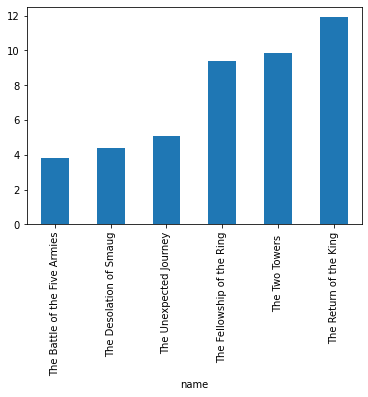

In [39]:
data.set_index("name")['roi'].sort_values().plot(kind='bar')


Oof, hard to read. A "horizontal bar graph" is a much better option.

Text(0.5, 1.0, 'LOTR Movies Sorted by Revenue/Budget')

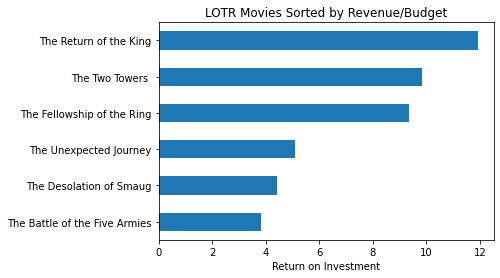

In [40]:
# Call the plot, which sets this graph as active in the space.
data.set_index("name")['roi'].sort_values().plot(kind='barh')

# Using the "matplotlib.pyplot" package, we can manipulate the parameters for whatever graph is active.
plt.xlabel("Return on Investment")
plt.ylabel("")
plt.title("LOTR Movies Sorted by Revenue/Budget")


### NASS API
https://quickstats.nass.usda.gov/api

The National Agricultural Statistics Service via the USDA serves up all of the USDA's surveys and censuses in one place. Using their GUI, we can download the spreadsheet manually, which could take forever. Using the API, we can read data in directly from their website.

Suppose that we want to know the total dairy cow population by state in 2017 as calculated by the Agricultural Census. They have a 50k record limit so we need to make sure our query has parameters.

Using their documentation, we can construct a Python dictionary that tells NASS what data we want. We'll call this dictionary "params."

In [41]:
URL = "http://quickstats.nass.usda.gov/api/api_GET/"

params = {"key":nass_key, # Put the API KEY
          "year":"2017", # The year Census we want.
          "domain_desc":"TOTAL", # total across all domains
          "source_desc":"CENSUS",# Specify that we want the Census, not a survey.
          "agg_level_desc":"STATE", # Specify that we want the state level.
          "short_desc":"CATTLE, COWS, MILK - INVENTORY" # The name of the variable, so we don't 
                                                        # have to specify more params
         }

In [42]:
r = requests.get(url = URL, params = params)
r.status_code

200

A 200 means __success!__

Now let's look at what we just downloaded.

In [43]:
r.json()

{'data': [{'commodity_desc': 'CATTLE',
   'asd_code': '',
   'Value': '5,949',
   'county_name': '',
   'reference_period_desc': 'END OF DEC',
   'end_code': '12',
   'state_name': 'ALABAMA',
   'domain_desc': 'TOTAL',
   'statisticcat_desc': 'INVENTORY',
   'county_code': '',
   'sector_desc': 'ANIMALS & PRODUCTS',
   'week_ending': '',
   'country_name': 'UNITED STATES',
   'state_fips_code': '01',
   'CV (%)': '26.2',
   'state_alpha': 'AL',
   'watershed_desc': '',
   'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
   'domaincat_desc': 'NOT SPECIFIED',
   'freq_desc': 'POINT IN TIME',
   'state_ansi': '01',
   'zip_5': '',
   'agg_level_desc': 'STATE',
   'group_desc': 'LIVESTOCK',
   'year': 2017,
   'congr_district_code': '',
   'unit_desc': 'HEAD',
   'watershed_code': '00000000',
   'location_desc': 'ALABAMA',
   'asd_desc': '',
   'load_time': '2018-02-01 00:00:00',
   'short_desc': 'CATTLE, COWS, MILK - INVENTORY',
   'region_desc': '',
   'county_ansi': '',
   'util_pract

Its a Python dictionary again, with the key "data" which maps to a list object full of more dictionaries.

Using Pandas:

In [44]:
data = pd.DataFrame(r.json()['data'])

data.head()

,commodity_desc,asd_code,Value,county_name,reference_period_desc,end_code,state_name,domain_desc,statisticcat_desc,county_code,...,asd_desc,load_time,short_desc,region_desc,county_ansi,util_practice_desc,class_desc,country_code,source_desc,begin_code
0,CATTLE,,"5,949",,END OF DEC,12,ALABAMA,TOTAL,INVENTORY,,...,,2018-02-01 00:00:00,"CATTLE, COWS, MILK - INVENTORY",,,ALL UTILIZATION PRACTICES,"COWS, MILK",9000,CENSUS,12
1,CATTLE,,(D),,END OF DEC,12,ALASKA,TOTAL,INVENTORY,,...,,2018-02-01 00:00:00,"CATTLE, COWS, MILK - INVENTORY",,,ALL UTILIZATION PRACTICES,"COWS, MILK",9000,CENSUS,12
2,CATTLE,,"211,937",,END OF DEC,12,ARIZONA,TOTAL,INVENTORY,,...,,2018-02-01 00:00:00,"CATTLE, COWS, MILK - INVENTORY",,,ALL UTILIZATION PRACTICES,"COWS, MILK",9000,CENSUS,12
3,CATTLE,,"6,114",,END OF DEC,12,ARKANSAS,TOTAL,INVENTORY,,...,,2018-02-01 00:00:00,"CATTLE, COWS, MILK - INVENTORY",,,ALL UTILIZATION PRACTICES,"COWS, MILK",9000,CENSUS,12
4,CATTLE,,"1,750,329",,END OF DEC,12,CALIFORNIA,TOTAL,INVENTORY,,...,,2018-02-01 00:00:00,"CATTLE, COWS, MILK - INVENTORY",,,ALL UTILIZATION PRACTICES,"COWS, MILK",9000,CENSUS,12


In [45]:
len(data)

50

There are 50 rows, so we indeed have the state level data we were looking for.

So now we have a DataFrame that we can analyze and work with. 

__BONUS: LET'S MAKE ANOTHER GRAPH__

First find the data stored in the "Value" column, and make a Series object indexed by the state abbreviation.

In [46]:
dem_cows = data.set_index("state_alpha")["Value"]
dem_cows

state_alpha
AL                   5,949
AK                     (D)
AZ                 211,937
AR                   6,114
CA               1,750,329
CO                 169,423
CT                  20,170
DE                   4,560
FL                 125,055
GA                  85,554
HI                     (D)
ID                 603,817
IL                  93,341
IN                 189,035
IA                 223,579
KS                 160,671
KY                  57,645
LA                  12,328
ME                  30,443
MD                  48,211
MA                  12,071
MI                 442,032
MN                 457,801
MS                   9,354
MO                  84,977
MT                  13,036
NE                  68,846
NV                  31,599
NH                  13,118
NJ                   6,354
NM                 337,888
NY                 628,245
NC                  45,422
ND                  16,470
OH                 269,069
OK                  46,369
OR              

Notice that __dtype: object__, so we have some non-numeric data (the D's).

But that isn't the only problem: we have commas in the values, causing Pandas to think this is a series of strings.

Using the "string accessor" of Series objects (".str") we can call a replace function and take out the commas.

In [47]:
dem_cows = dem_cows.str.replace(",","")

Another useful function here is ".to_numeric()", which will attempt to convert strings to numbers, and we can also tell it to make anything it can't coerce into a missing value:

In [48]:
dem_cows = pd.to_numeric(dem_cows,errors='coerce')

dem_cows

state_alpha
AL       5949.0
AK          NaN
AZ     211937.0
AR       6114.0
CA    1750329.0
CO     169423.0
CT      20170.0
DE       4560.0
FL     125055.0
GA      85554.0
HI          NaN
ID     603817.0
IL      93341.0
IN     189035.0
IA     223579.0
KS     160671.0
KY      57645.0
LA      12328.0
ME      30443.0
MD      48211.0
MA      12071.0
MI     442032.0
MN     457801.0
MS       9354.0
MO      84977.0
MT      13036.0
NE      68846.0
NV      31599.0
NH      13118.0
NJ       6354.0
NM     337888.0
NY     628245.0
NC      45422.0
ND      16470.0
OH     269069.0
OK      46369.0
OR     128284.0
PA     527617.0
RI        833.0
SC      15310.0
SD     127325.0
TN      40623.0
TX     531849.0
UT      98389.0
VT     128742.0
VA      87322.0
WA     276914.0
WV       7242.0
WI    1280395.0
WY       5719.0
Name: Value, dtype: float64

dtype is now float, so we're good to go.

Let's find the top 10 states by dairy cow population and look at a bar graph.

Text(0.5, 1.0, 'Top Ten States by Dairy Cow Population')

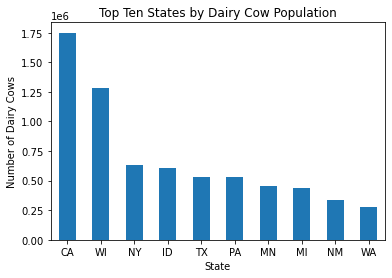

In [49]:
# Find a tiny little series of the top 10 states.
top10 = dem_cows.sort_values(ascending=False).head(10)

# Graph it using the built in matplotlib functionality.
top10.plot(kind='bar')

# Specify some things with the graph
plt.xticks(rotation=0)
plt.xlabel("State")
plt.ylabel("Number of Dairy Cows")
plt.title("Top Ten States by Dairy Cow Population")

## Bonus Assignments:

### Assignment 1: Is LOTR a Man's World?
J.R.R. Tolkein's book series is one of the most influential in the fantasy genre. There are criticisms, however, that Tolkein has too few female characters in his books:

[Margaret Atwood: 'In Tolkien, there are hardly any women at all' - The Guardian](https://www.theguardian.com/books/2015/nov/09/margaret-atwood-diversity-fiction-book-riot-live)

[Why Tolkien and His Imperialist, Sexist Hate Bible Need To Be Reevaluated #ClassroomsSoWhite - Affinity](http://culture.affinitymagazine.us/why-tolkein-and-his-imperialist-sexist-hate-bible-need-to-be-reevaluated-classroomssowhite/)

Using the LOTR API, evaluate this claim using its database on characters and their details.

### Assignment 2: Alpacalypse Now
While the United States is home to millions of dairy cows, it is also home to a much furrier type of livestock from South America: the Alpaca.

According to some economists, the price of Alpacas was supported by a huge bubble, were a terrible investment, and the Alpaca trend is dead in the United States:

[When the Great Alpaca Bubble Burst - Priceonomics](https://priceonomics.com/when-the-great-alpaca-bubble-burst/)

What is the state of the US Alpaca industry today? Using the NASS API, download data on Alpacas and characterize the Alpaca industry since 2007.